# 코랩 한글깨짐 방지
- https://giveme-happyending.tistory.com/192

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import pandas as pd
import numpy as np

# Load the data
data = {
    'id': [1, 2, 3, 4, 5],      # 학교명
    'x1': [10, 12, 9, 8, 11],   # 학교 위경도
    'x2': [7, 9, 7, 5, 7],      # 학생 수
    'numbers' : [100, 200, 400,300, 500],
    'cluster': [1, 1, 2, 2, 1],
    'cluster_x1': [9, 9, 6, 6, 9],  # 그룹의 중심좌표1
    'cluster_x2': [9, 9, 6, 6, 9]   # 그룹의 중심좌표2
}

df = pd.DataFrame(data)

# Calculate the Euclidean distance to cluster 1
df['이동거리2cluster1'] = np.sqrt((df['x1'] - 9)**2 + (df['x2'] - 9)**2)

# Calculate the Euclidean distance to cluster 2
df['이동거리2cluster2'] = np.sqrt((df['x1'] - 6)**2 + (df['x2'] - 6)**2)
df


,id,x1,x2,numbers,cluster,cluster_x1,cluster_x2,이동거리2cluster1,이동거리2cluster2
0,1,10,7,100,1,9,9,2.236068,4.123106
1,2,12,9,200,1,9,9,3.000000,6.708204
2,3,9,7,400,2,6,6,2.000000,3.162278
3,4,8,5,300,2,6,6,4.123106,2.236068
4,5,11,7,500,1,9,9,2.828427,5.099020


In [3]:
# prompt: distance_to_cluster1과 distance_to_cluster2 를 비교하여 더 적은 값을 가진 cluster 값을 기록하라
df['배정cluster'] = np.where(df['이동거리2cluster1'] < df['이동거리2cluster2'], 1, 2)
df


,id,x1,x2,numbers,cluster,cluster_x1,cluster_x2,이동거리2cluster1,이동거리2cluster2,배정cluster
0,1,10,7,100,1,9,9,2.236068,4.123106,1
1,2,12,9,200,1,9,9,3.000000,6.708204,1
2,3,9,7,400,2,6,6,2.000000,3.162278,1
3,4,8,5,300,2,6,6,4.123106,2.236068,2
4,5,11,7,500,1,9,9,2.828427,5.099020,1


In [4]:
# prompt: numbers의 값을 assigned_cluster에 해당되는 그룹에 전부 할당하는 컬럼 numbers2cluster1, numbers2cluster2 컬럼을 만들어라

# Create new columns for numbers assigned to clusters
df['이동학생수2cluster1'] = np.where(df['배정cluster'] == 1, df['numbers'], 0)
df['이동학생수2cluster2'] = np.where(df['배정cluster'] == 2, df['numbers'], 0)

df

,id,x1,x2,numbers,cluster,cluster_x1,cluster_x2,이동거리2cluster1,이동거리2cluster2,배정cluster,이동학생수2cluster1,이동학생수2cluster2
0,1,10,7,100,1,9,9,2.236068,4.123106,1,100,0
1,2,12,9,200,1,9,9,3.000000,6.708204,1,200,0
2,3,9,7,400,2,6,6,2.000000,3.162278,1,400,0
3,4,8,5,300,2,6,6,4.123106,2.236068,2,0,300
4,5,11,7,500,1,9,9,2.828427,5.099020,1,500,0


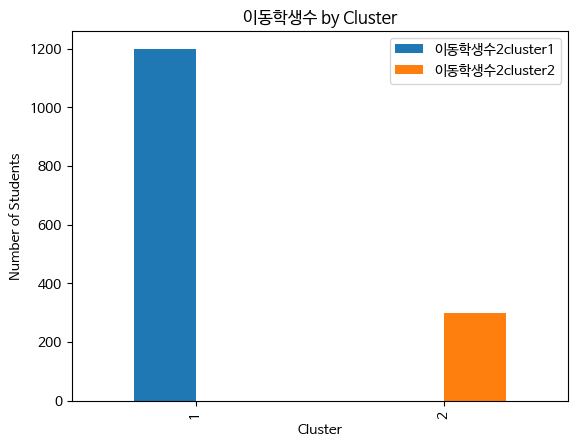

In [5]:
# prompt: 이동학생수2cluster1	이동학생수2cluster2 바차트

import matplotlib.pyplot as plt

# Group the DataFrame by '배정cluster' and sum the '이동학생수2cluster1' and '이동학생수2cluster2' columns
cluster_sums = df.groupby('배정cluster')[['이동학생수2cluster1', '이동학생수2cluster2']].sum()

# Plot the bar chart
cluster_sums.plot(kind='bar')
plt.title('이동학생수 by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Students')
plt.show()


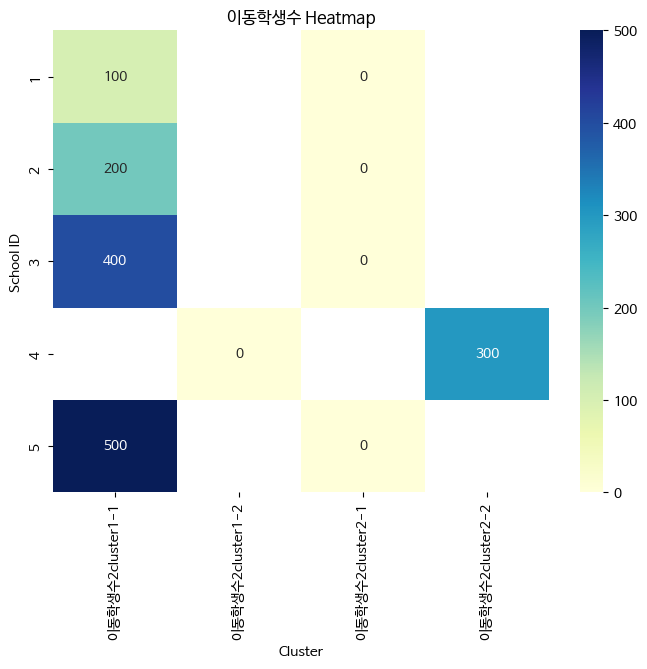

In [6]:
# prompt: 이동학생수2cluster1	이동학생수2cluster2 seaborborn heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='id', columns='배정cluster', values=['이동학생수2cluster1', '이동학생수2cluster2'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('이동학생수 Heatmap')
plt.xlabel('Cluster')
plt.ylabel('School ID')
plt.show()
